<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/03_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC(%ED%99%9C%EC%9A%A9_%ED%91%9C%EC%A4%80%EC%A0%90%EC%88%98)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 사전 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

In [ ]:
# 리스트를 일렬로 세운 다음 차례대로 나란히 연결
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))

In [ ]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [ ]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [ ]:
# 결과 데이터 만들기
# - 49개 데이터중 앞에서 35개는 도미, 그외는 빙어이므로 셋팅함.
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# 사이킷런으로 train, test 데이터 분류하기
# train_test_split() 함수사용하기
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# 학습
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict([[25,150]])

array([0.])

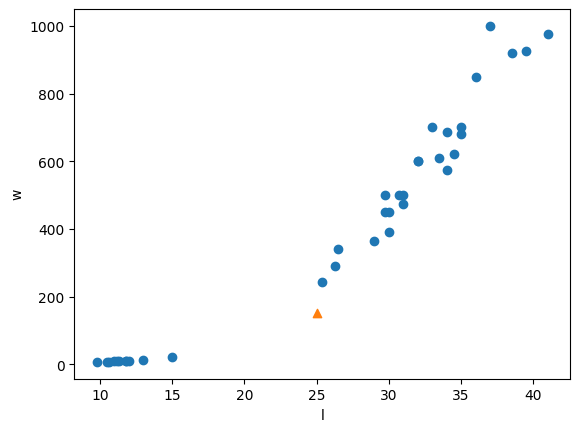

In [ ]:
# 산점도로 확인
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')

plt.xlabel('l')
plt.ylabel('w')
plt.show()

In [ ]:
distance, indexes = kn.kneighbors([[25,159]])

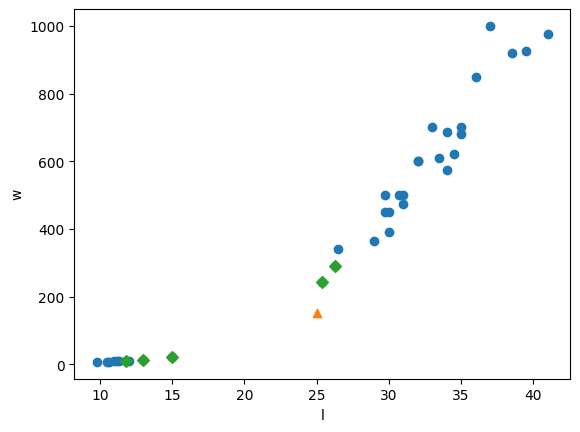

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('l')
plt.ylabel('w')
plt.show()

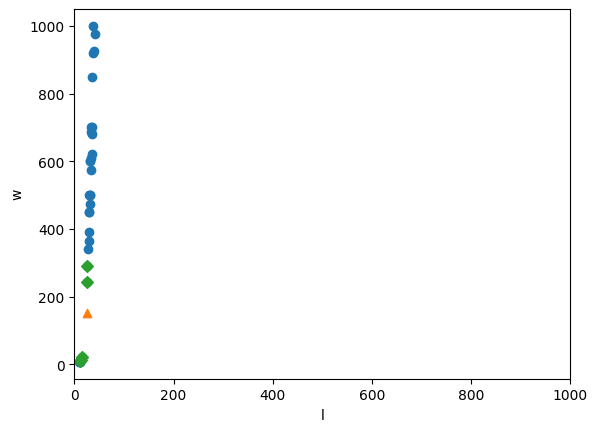

In [ ]:
# x축 범위를 0~1000으로

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlim(0, 1000)
plt.xlabel('l')
plt.ylabel('w')
plt.show()

In [ ]:
# 표준점수 - 평균에서 얼마나 떨어져있는가
# 공식 : 표준점수 = (원점수 - 평균) / 표준편차
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [ ]:
mean, std

(array([ 26.175     , 418.08888889]), array([ 10.21073441, 321.67847023]))

In [ ]:
train_scaled = (train_input - mean) / std

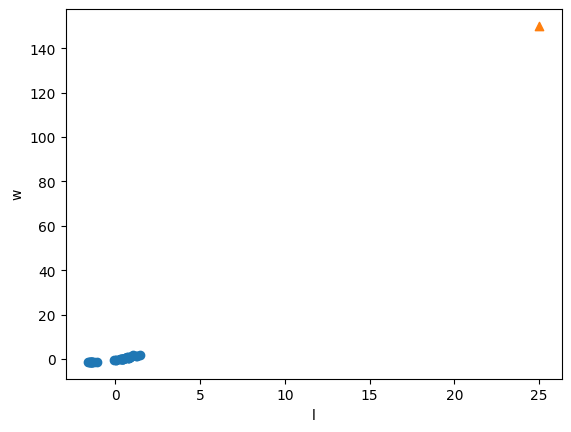

In [ ]:
# 표준점수
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('l')
plt.ylabel('w')
plt.show()

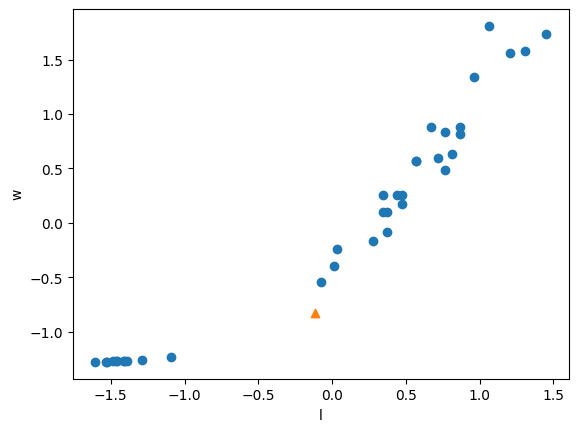

In [ ]:
# 훈련데이터를 표준점수 변환하기.
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('l')
plt.ylabel('w')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
# test 데이터도 train 데이터처럼 표준점수로 변환
test_scaled = (test_input - mean) / std
test_scaled

array([[ 0.57047806, -0.24275448],
       [-1.34907044, -1.25805401],
       [-1.16299176, -1.23846923],
       [-1.36865767, -1.26178444],
       [ 0.66841421,  0.87637544],
       [ 0.96222266,  0.91989716],
       [ 0.86428651,  0.93854933],
       [ 0.86428651,  0.9540928 ],
       [ 1.20706303,  1.66909247],
       [ 0.71738229,  0.72094073],
       [ 0.52150999,  0.2546366 ],
       [ 0.27666962,  0.037028  ],
       [ 1.4519034 ,  1.65354899]])

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
# 도미 [[25, 150]] <- 데이터로 예측해보기
kn.predict([new])

array([1.])

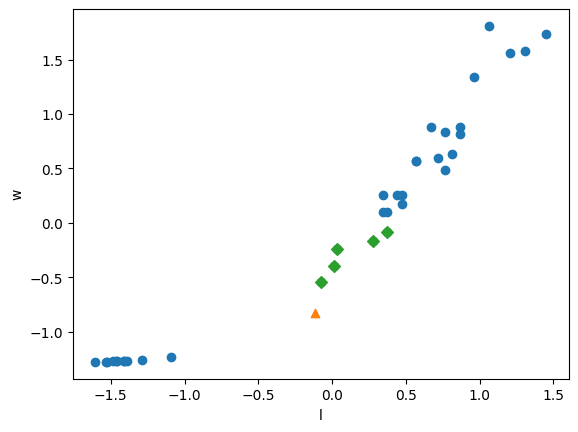

In [ ]:
# kn.knighbors() 함수 사용해서 가까운 5개의 데이터 가져오기
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1], marker='D')      # 기준점에서 가장 가까운 5개의 점

plt.xlabel('l')
plt.ylabel('w')
plt.show()